In [1]:
import scanpy as sc
import singleCellHaystack as hs

sc.set_figure_params(facecolor="white", dpi=90)

# Load toy data

In [2]:
adata = hs.load_toy()
adata

AnnData object with n_obs × n_vars = 601 × 500
    obsm: 'X_tsne'

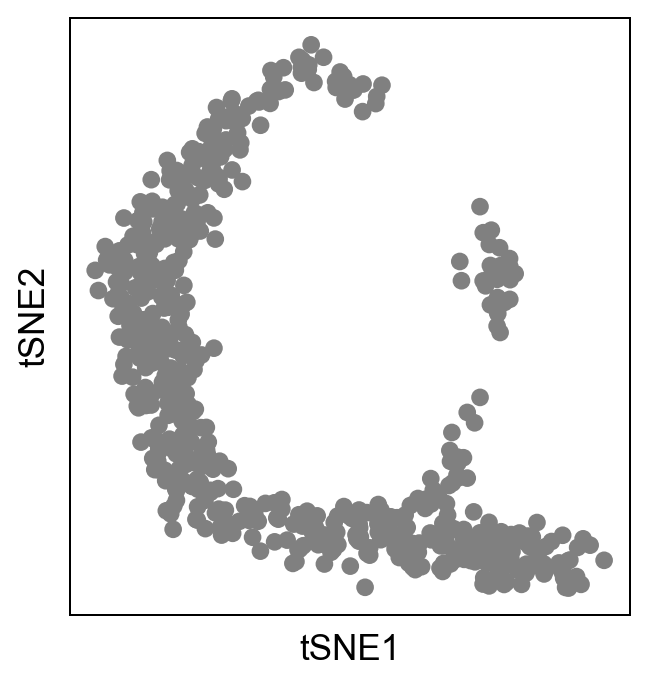

In [3]:
sc.pl.scatter(adata, basis="tsne")

# Run haystack

In [4]:
res = hs.haystack(adata, coord="tsne", n_randomizations=100, n_genes_to_randomize=100, spline_method="ns")

> starting haystack ...
> entering array method ...
> scaling coordinates ...
> calculating feature stds ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 500 features ...


100%|██████████| 500/500 [00:00<00:00, 5689.77it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████| 100/100 [00:01<00:00, 69.84it/s]


> calculating P values ...
> done.


# QC

We can examine some of the QC plots. First the randomization fits. These are used to calculate KLD from randomized expression levels for a subset of genes, in order to estimate the values to the entire gene set.

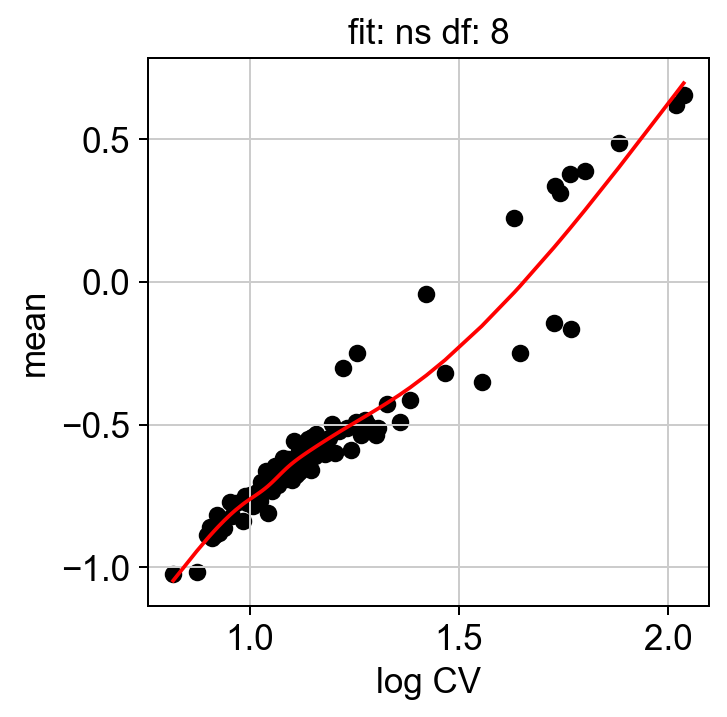

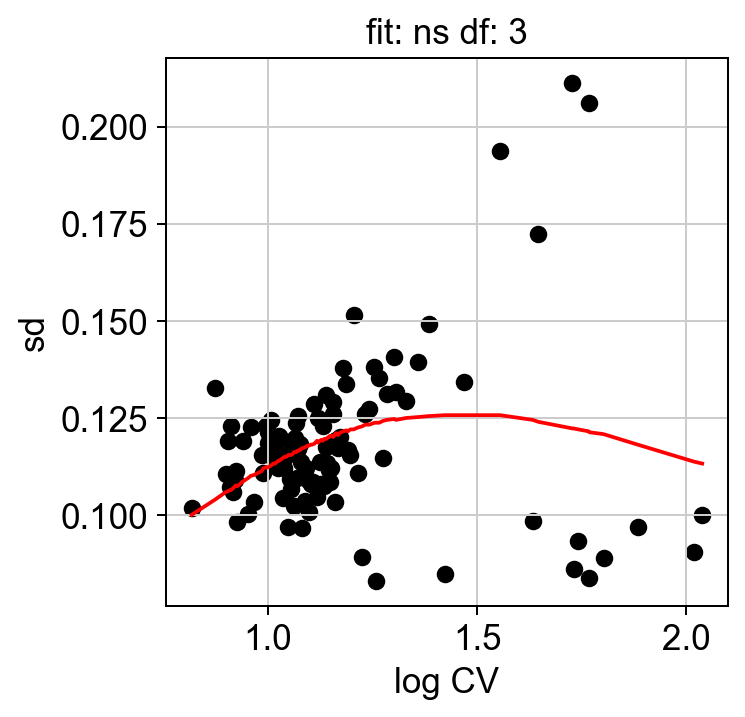

In [5]:
hs.plot_rand_fit(res, "mean")
hs.plot_rand_fit(res, "sd")

The ranking of logpval and distribution of pval gives us some idea of how many significant genes we can detect.

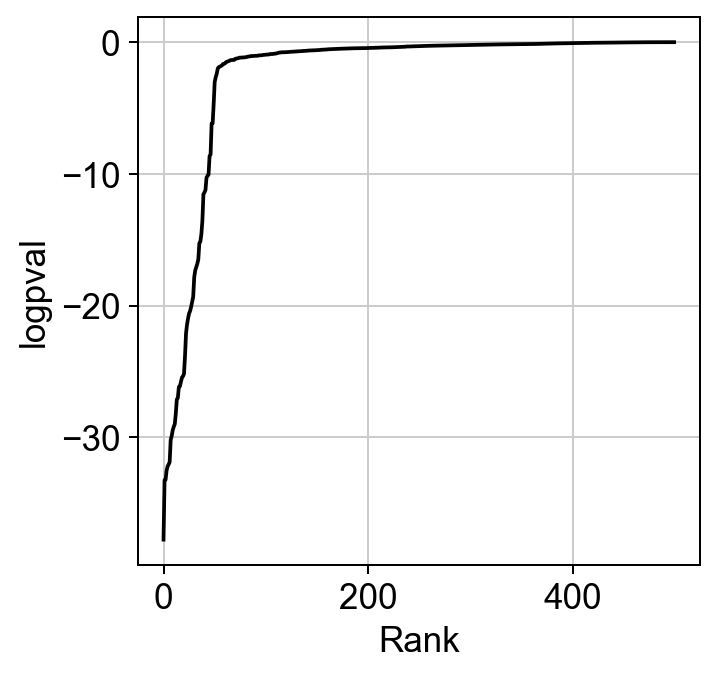

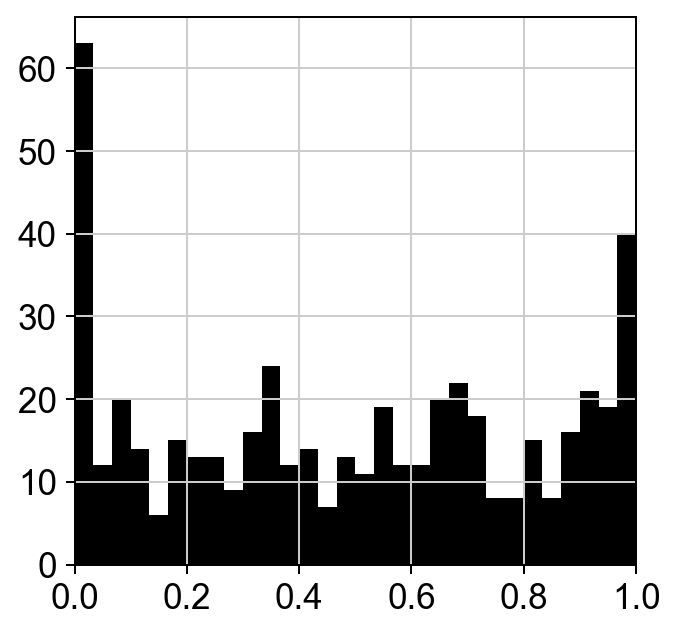

In [6]:
hs.plot_pval_rank(res)
hs.plot_pval_hist(res)

# Results

A pandas DataFrame with the results can be obtained. By default the results are sorted by logpval_adj.

In [7]:
sum = res["results"]
sum

,gene,KLD,pval,pval_adj,logpval,logpval_adj
241,gene_242,1.801961,1.748949e-38,8.744746e-36,-3.775722e+01,-35.058253
274,gene_275,1.738050,5.804561e-34,2.902281e-31,-3.323623e+01,-30.537261
496,gene_497,1.945970,6.162514e-34,3.081257e-31,-3.321024e+01,-30.511272
350,gene_351,1.817486,3.136079e-33,1.568039e-30,-3.250361e+01,-29.804643
338,gene_339,1.730166,6.431448e-33,3.215724e-30,-3.219169e+01,-29.492721
...,...,...,...,...,...,...
187,gene_188,0.469387,9.999956e-01,1.000000e+00,-1.904205e-06,0.000000
362,gene_363,0.685665,9.999987e-01,1.000000e+00,-5.429706e-07,0.000000
447,gene_448,0.526370,9.999993e-01,1.000000e+00,-2.903058e-07,0.000000
374,gene_375,0.471640,9.999999e-01,1.000000e+00,-3.192371e-08,0.000000


Plot top 4 genes.

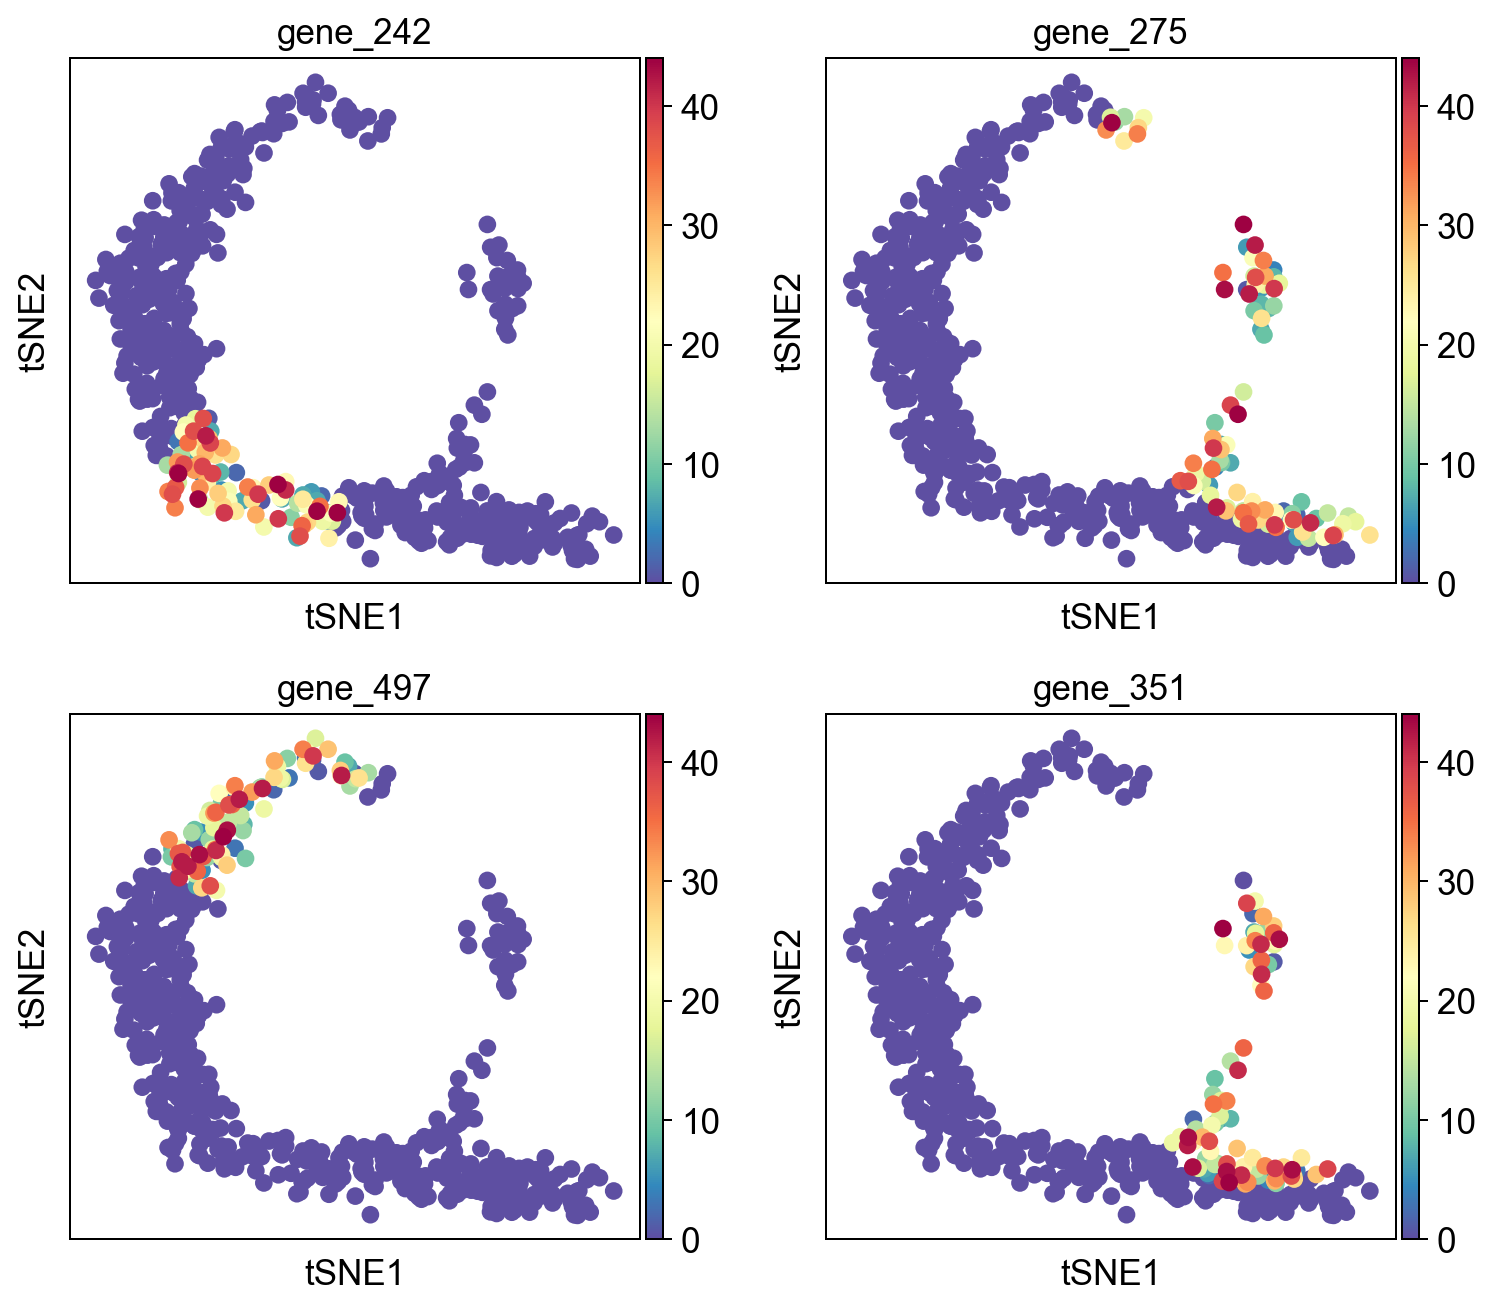

In [8]:
sc.pl.tsne(adata, color=sum.gene.iloc[:4], ncols=2, cmap="Spectral_r")

# Export results

In [9]:
#sum.to_csv("toy-results.tsv")